# Test.ipynb
This jupyter notebook is used for the purpose of testing and evaluationg the trained machine learning models.

## Import Libraries and Magic

In [1]:
# load libraries and magics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('bmh')
from pandas.plotting import scatter_matrix
from pandas import DatetimeIndex as dt
import joblib
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.metrics import accuracy_score


## Load the datasets

This includes the original dataset, and the prepared test/train datasets for each machine learning task

In [2]:
#original dataset
dataset = pd.read_csv("supermarket_sales.csv")

# For Multiple Linear Regression tasks
lr_train_set_prepared = pd.read_csv("lr_train_set_prepared.csv")
lr_test_set_prepared = pd.read_csv("lr_test_set_prepared.csv")

# For Gender Classification task
gender_train_set_prepared = pd.read_csv("gender_train_set_prepared.csv")
gender_test_set_prepared = pd.read_csv("gender_test_set_prepared.csv")

# For Customer Type Classification task
customer_train_set_prepared = pd.read_csv("customer_train_set_prepared.csv")
customer_test_set_prepared = pd.read_csv("customer_test_set_prepared.csv")

# For Prediction of day of purchase
day_train_set_prepared = pd.read_csv("day_train_set_prepared.csv")
day_test_set_prepared = pd.read_csv("day_test_set_prepared.csv")

## Load the trained models

There are a total of 8 trained models for a total of 5 different tasks

In [3]:
# Linear regression without lasso for predicting gross income
final_linear_model_gross_income = joblib.load("final_linear_model_gross_income.pkl")

# Linear regression with lasso for predicting gross income
final_linear_lasso_model_gross_income = joblib.load("final_linear_lasso_model_gross_income.pkl")

# Linear regression without lasso for predicting unit price
final_linear_model_unit_price = joblib.load("final_linear_model_unit_price.pkl")

# Linear regression with lasso for predicting unit price
final_linear_lasso_model_unit_price = joblib.load("final_linear_lasso_model_unit_price.pkl")

# Logistic regression to classify gender
final_log_model_gender = joblib.load("final_log_model_gender.pkl")

# Logistic regression to classify customer type
final_log_model_customer = joblib.load("final_log_model_customer.pkl")

# Decision tree classifier to predict day of purchase
final_dt_model_day = joblib.load("final_dt_model_day.pkl")

# Decision tree classifier to predict day of purchase
final_rf_model_day = joblib.load("final_rf_model_day.pkl")


## Predicting the output of trained models

### Multiple Linear regression for predicting gross income

In [4]:
lr_train_data = lr_train_set_prepared.drop(["gross income"], axis = 1)
lr_train_target = lr_train_set_prepared["gross income"]

lr_test_data = lr_test_set_prepared.drop(["gross income"], axis = 1)
lr_test_target = lr_test_set_prepared["gross income"]

#### Without lasso regularization

In [5]:
predicted_train_gi = final_linear_model_gross_income.predict(lr_train_data)

predicted_test_gi = final_linear_model_gross_income.predict(lr_test_data)

#### With lasso

In [6]:
predicted_train_lasso_gi = final_linear_lasso_model_gross_income.predict(lr_train_data)

predicted_test_lasso_gi = final_linear_lasso_model_gross_income.predict(lr_test_data)

### Multiple Linear regression for predicting unit price

In [7]:
lr_train_data2 = lr_train_set_prepared.drop(["Unit price"], axis = 1)
lr_train_target2 = lr_train_set_prepared["Unit price"]

lr_test_data2 = lr_test_set_prepared.drop(["Unit price"], axis = 1)
lr_test_target2 = lr_test_set_prepared["Unit price"]

#### Without  lasso regularization

In [8]:
predicted_train_up = final_linear_model_unit_price.predict(lr_train_data2)

predicted_test_up = final_linear_model_unit_price.predict(lr_test_data2)

#### With lasso

In [9]:
predicted_train_lasso_up = final_linear_lasso_model_unit_price.predict(lr_train_data2)

predicted_test_lasso_up = final_linear_lasso_model_unit_price.predict(lr_test_data2)

### Logistic Regression to Classify Gender

In [10]:
gender_train_data = gender_train_set_prepared.drop(["Male", "Female"], axis = 1)
gender_train_target = gender_train_set_prepared["Male"]

gender_test_data = gender_test_set_prepared.drop(["Male","Female"], axis = 1)
gender_test_target = gender_test_set_prepared["Male"]

In [11]:
predicted_train_gender = final_log_model_gender.predict(gender_train_data)

predicted_test_gender = final_log_model_gender.predict(gender_test_data)

### Logistic Regression to Classify Customer type

In [12]:
customer_train_data = customer_train_set_prepared.drop(["Customer type"], axis = 1)
customer_train_target = customer_train_set_prepared["Customer type"]

customer_test_data = customer_test_set_prepared.drop(["Customer type"], axis = 1)
customer_test_target = customer_test_set_prepared["Customer type"]

In [13]:
predicted_train_customer = final_log_model_customer.predict(customer_train_data)

predicted_test_customer = final_log_model_customer.predict(customer_test_data)

### Classifiers for Predicting the Day of Purchase

In [14]:
day_train_data = day_train_set_prepared.drop(["Date"], axis = 1)
day_train_target = day_train_set_prepared["Date"]

day_test_data = day_test_set_prepared.drop(["Date"], axis = 1)
day_test_target = day_test_set_prepared["Date"]

#### With Decision Tree

In [15]:
predicted_train_dt_day = final_dt_model_day.predict(day_train_data)

predicted_test_dt_day = final_dt_model_day.predict(day_test_data)

#### With Random Forest

In [16]:
predicted_train_rf_day = final_rf_model_day.predict(day_train_data)

predicted_test_rf_day = final_rf_model_day.predict(day_test_data)

===============================================================================

Now that we have the predictions, the final step is evaluation and observations regarding the given tasks.

===============================================================================

## Evaluation and Observation

### Multiple Linear regression for predicting gross income

For evaluating this we will be using r^2 score nad it's 95% confidence interval

#### Without lasso

In [17]:
lr_train_target.shape

(800,)

In [18]:
lr_test_target.shape

(200,)

In [19]:
confidence = 0.95

# for training dataset
predicted_train_gi.reshape(800,1)
r2_gi = r2_score(lr_train_target,predicted_train_gi)

t = lr_train_target.to_numpy().reshape(800)
scores1 = ((predicted_train_gi)**2) /((t)**2)

print("For training data, r^2 score is ", r2_gi, " and 95% confidence interval is ", stats.t.interval(confidence, len(scores1) - 1,
                 loc=scores1.mean(),
                 scale=scores1.std(ddof=1)/np.sqrt(len(scores1))))

# for testing dataset
predicted_test_gi.reshape(200,1)
r2_gi1 = r2_score(lr_test_target,predicted_test_gi)

t = lr_test_target.to_numpy().reshape(200)
scores2 = ((predicted_test_gi)**2) /((t)**2)

print("For testing data, r^2 score is ", r2_gi1, " and 95% confidence interval is ", stats.t.interval(confidence, len(scores2) - 1,
                 loc=scores2.mean(),
                 scale=scores2.std(ddof=1)/np.sqrt(len(scores2))))

For training data, r^2 score is  0.8866856425693278  and 95% confidence interval is  (-18.192457893952962, 95.20596294201955)
For testing data, r^2 score is  0.9048251213906985  and 95% confidence interval is  (-0.3816482608800258, 7.7242048315752)


#### With lasso

In [20]:
confidence = 0.95

# for training dataset
predicted_train_gi.reshape(800,1)
r2_gi = r2_score(lr_train_target,predicted_train_lasso_gi)

t = lr_train_target.to_numpy().reshape(800)
scores1 = ((predicted_train_lasso_gi)**2) /((t)**2)

print("For training data, r^2 score is ", r2_gi, " and 95% confidence interval is ", stats.t.interval(confidence, len(scores1) - 1,
                 loc=scores1.mean(),
                 scale=scores1.std(ddof=1)/np.sqrt(len(scores1))))

# for testing dataset
predicted_test_gi.reshape(200,1)
r2_gi1 = r2_score(lr_test_target,predicted_test_lasso_gi)

t = lr_test_target.to_numpy().reshape(200)
scores2 = ((predicted_test_lasso_gi)**2) /((t)**2)

print("For testing data, r^2 score is ", r2_gi1, " and 95% confidence interval is ", stats.t.interval(confidence, len(scores2) - 1,
                 loc=scores2.mean(),
                 scale=scores2.std(ddof=1)/np.sqrt(len(scores2))))

For training data, r^2 score is  0.8857961155347721  and 95% confidence interval is  (-16.015794758951564, 84.40409096984598)
For testing data, r^2 score is  0.9033248630665663  and 95% confidence interval is  (-0.487470459343637, 7.264882377148605)


#### Effect of attributes on gross income

In [21]:
corr_matrix = lr_test_set_prepared.corr(method='pearson')   # creating a correlation matrix for current numerical attributes

corr_matrix['gross income'].sort_values(ascending=False)

gross income              1.000000
Quantity                  0.719682
Unit price                0.679604
Electronic accessories    0.089542
Thurday                   0.084192
Tuesday                   0.070058
Food and beverage         0.051602
Sunday                    0.039355
Night                     0.037641
Home and lifestyle        0.028862
Saturday                  0.026788
Evening                   0.017104
Fashion accessories      -0.006514
Afternoon                -0.007125
Friday                   -0.027086
Morning                  -0.038884
Health and beauty        -0.061648
Wednesday                -0.087655
Monday                   -0.092892
Sports and travel        -0.095087
Name: gross income, dtype: float64

Using the correlation matrix it shows that Gross income has highest positive correlation with *Quantity*, followed by *Unit price, Electronic accessories and Thursday* 

#### Best $\lambda$ for lasso

In [22]:
final_linear_lasso_model_gross_income

Pipeline(steps=[('Lasso', Lasso(alpha=0.010000000000000002))])

The best $\lambda$ for lasso regularizer is 0.010000000000000002.

I had removed 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender','Total','Payment', 'cogs', 'gross margin percentage','Rating' features because of being redundant/not important for the task

### Multiple Linear regression for predicting unit price

For evaluating this we will be using r^2 score nad it's 95% confidence interval

#### Without Lasso

In [23]:
confidence = 0.95

# for training dataset
predicted_train_up.reshape(800,1)
r2_up = r2_score(lr_train_target2,predicted_train_up)

t = lr_train_target2.to_numpy().reshape(800)
scores1 = ((predicted_train_up)**2) /((t)**2)

print("For training data, r^2 score is ", r2_up, " and 95% confidence interval is ", stats.t.interval(confidence, len(scores1) - 1,
                 loc=scores1.mean(),
                 scale=scores1.std(ddof=1)/np.sqrt(len(scores1))))

# for testing dataset
predicted_test_up.reshape(200,1)
r2_up1 = r2_score(lr_test_target2,predicted_test_up)

t = lr_test_target2.to_numpy().reshape(200)
scores2 = ((predicted_test_up)**2) /((t)**2)

print("For testing data, r^2 score is ", r2_up1, " and 95% confidence interval is ", stats.t.interval(confidence, len(scores2) - 1,
                 loc=scores2.mean(),
                 scale=scores2.std(ddof=1)/np.sqrt(len(scores2))))

For training data, r^2 score is  0.7785609514013406  and 95% confidence interval is  (0.1852370049272225, 4.618126532777801)
For testing data, r^2 score is  0.794273232933886  and 95% confidence interval is  (0.6996066580028524, 1.625860704911672)


#### With Lasso

In [24]:
confidence = 0.95

# for training dataset
predicted_train_up.reshape(800,1)
r2_up = r2_score(lr_train_target,predicted_train_lasso_up)

t = lr_train_target.to_numpy().reshape(800)
scores1 = ((predicted_train_lasso_up)**2) /((t)**2)

print("For training data, r^2 score is ", r2_up, " and 95% confidence interval is ", stats.t.interval(confidence, len(scores1) - 1,
                 loc=scores1.mean(),
                 scale=scores1.std(ddof=1)/np.sqrt(len(scores1))))

# for testing dataset
predicted_test_up.reshape(200,1)
r2_up1 = r2_score(lr_test_target,predicted_test_lasso_up)

t = lr_test_target.to_numpy().reshape(200)
scores2 = ((predicted_test_lasso_up)**2) /((t)**2)

print("For testing data, r^2 score is ", r2_up1, " and 95% confidence interval is ", stats.t.interval(confidence, len(scores2) - 1,
                 loc=scores2.mean(),
                 scale=scores2.std(ddof=1)/np.sqrt(len(scores2))))

For training data, r^2 score is  0.7911583077776843  and 95% confidence interval is  (-89.78651821385827, 430.4203972421658)
For testing data, r^2 score is  0.8417603221127841  and 95% confidence interval is  (1.305330748034982, 13.620150550032257)


#### Effect of attributes on unit price

In [25]:
corr_matrix = lr_test_set_prepared.corr(method='pearson')   # creating a correlation matrix for current numerical attributes

corr_matrix['Unit price'].sort_values(ascending=False)

Unit price                1.000000
gross income              0.679604
Electronic accessories    0.151244
Food and beverage         0.139876
Quantity                  0.081553
Sunday                    0.070186
Tuesday                   0.067670
Thurday                   0.062077
Evening                   0.038742
Saturday                  0.036462
Home and lifestyle        0.024412
Morning                   0.023644
Monday                   -0.013052
Night                    -0.026185
Afternoon                -0.029385
Health and beauty        -0.047005
Fashion accessories      -0.068271
Friday                   -0.083091
Wednesday                -0.136357
Sports and travel        -0.185531
Name: Unit price, dtype: float64

Using the correlation matrix it shows that Unit price has highest positive correlation with *gross income*, followed by *Electronic accessories, Food and beverage,Quantity and Sunday* 

#### Best $\lambda$ for lasso

In [26]:
final_linear_lasso_model_unit_price

Pipeline(steps=[('Lasso', Lasso(alpha=0.010000000000000002))])

The best $\lambda$ for lasso regularizer is 0.010000000000000002.

I had removed 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender','Total','Payment', 'cogs', 'gross margin percentage','Rating' features because of being redundant/not important for the task

### Logistic Regression for classifying gender


In [27]:
print("Classification report on classifying gender on training data(0-> Male, 1-> Femeale)")
print(classification_report(gender_train_target,predicted_train_gender))

Classification report on classifying gender on training data(0-> Male, 1-> Femeale)
              precision    recall  f1-score   support

         0.0       0.64      0.73      0.68       142
         1.0       0.61      0.52      0.56       120

    accuracy                           0.63       262
   macro avg       0.63      0.62      0.62       262
weighted avg       0.63      0.63      0.63       262



In [28]:
print("Classification report on classifying gender on testing data(0-> Male, 1-> Femeale)")
print(classification_report(gender_test_target,predicted_test_gender))

Classification report on classifying gender on testing data(0-> Male, 1-> Femeale)
              precision    recall  f1-score   support

         0.0       0.63      0.61      0.62        36
         1.0       0.55      0.57      0.56        30

    accuracy                           0.59        66
   macro avg       0.59      0.59      0.59        66
weighted avg       0.59      0.59      0.59        66



#### Getting Parameter Values

In [29]:
poly_X = final_log_model_gender.named_steps['PolynomialFeatures'].transform(gender_test_data)

In [30]:
poly_attributes = ['Intercept']
N_attributes = final_log_model_gender.named_steps['PolynomialFeatures'].powers_.shape[0]
attrib_names = gender_test_data.columns

for i in range(1,N_attributes):
    temp = attrib_names[final_log_model_gender.named_steps['PolynomialFeatures'].powers_[i,:]==1]
    
    if len(temp)==1:
        poly_attributes += [temp[0]]
    else:
        poly_attributes += [temp[0]+' + '+temp[1]]
        
poly_attributes = np.array(poly_attributes).reshape(-1,1)

In [31]:
w = final_log_model_gender.named_steps['LogisticRegression'].coef_.T

In [32]:
dataf = pd.DataFrame(np.hstack((poly_attributes,w)), columns=['Attributes', 'Coefficients'])
dataf['Coefficients'] = dataf['Coefficients'].astype(float)
dataf.sort_values(by='Coefficients', key=abs, ascending=False)

,Attributes,Coefficients
13,gross income + Food and beverages,-0.605799
27,Electronic accessories + Ewallet,0.460744
44,Health and beauty + Credit card,0.445073
16,gross income + Sports and travel,-0.431642
32,Fashion accessories + Cash,0.398857
11,gross income + Electronic accessories,0.341859
34,Fashion accessories + Ewallet,-0.319338
7,Sports and travel,-0.284125
39,Food and beverages + Credit card,-0.264958
14,gross income + Health and beauty,0.264817


Thus, the most informative and important features (top 5) for gender=Male are - 
1. **gross income + Food and beverages**	
2. **Electronic accessories + Ewallet**
3. **Health and beauty + Credit card**
4. **gross income + Sports and travel**
5. **Fashion accessories + Cash**

Text(0.5, 0, 'attribute index number')

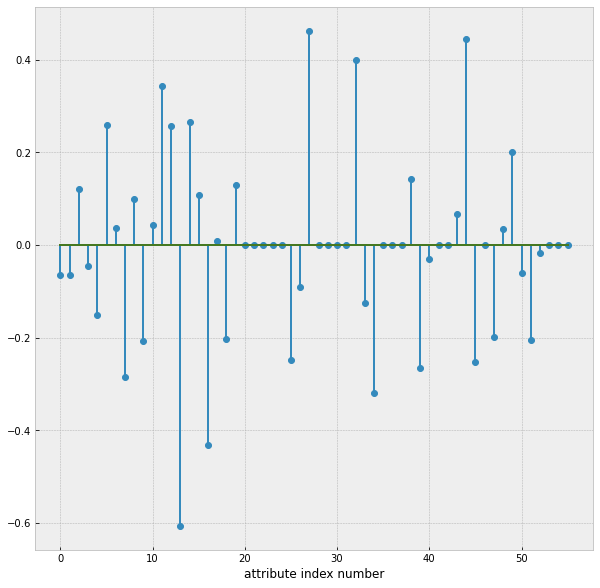

In [33]:
plt.rcParams["figure.figsize"] = (10,10)

plt.figure()
plt.stem(dataf["Coefficients"])
plt.xlabel('attribute index number')

### Logistic Regression for classifying customer type

In [34]:
print("Classification report on classifying customer type on training data(0-> Normal, 1-> Member)")
print(classification_report(customer_train_target,predicted_train_customer))

Classification report on classifying customer type on training data(0-> Normal, 1-> Member)
              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67       135
         1.0       0.65      0.71      0.68       127

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262



In [35]:
print("Classification report on classifying customer type on testing data(0-> Normal, 1-> Member)")
print(classification_report(customer_test_target,predicted_test_customer))

Classification report on classifying customer type on testing data(0-> Normal, 1-> Member)
              precision    recall  f1-score   support

         0.0       0.43      0.29      0.35        34
         1.0       0.44      0.59      0.51        32

    accuracy                           0.44        66
   macro avg       0.44      0.44      0.43        66
weighted avg       0.44      0.44      0.43        66



#### Getting Parameter values

In [36]:
poly_X = final_log_model_customer.named_steps['PolynomialFeatures'].transform(customer_test_data)

In [37]:
poly_attributes = ['Intercept']
N_attributes = final_log_model_customer.named_steps['PolynomialFeatures'].powers_.shape[0]
attrib_names = customer_test_data.columns

for i in range(1,N_attributes):
    temp = attrib_names[final_log_model_customer.named_steps['PolynomialFeatures'].powers_[i,:]==1]
    
    if len(temp)==1:
        poly_attributes += [temp[0]]
    else:
        poly_attributes += [temp[0]+' + '+temp[1]]
        
poly_attributes = np.array(poly_attributes).reshape(-1,1)

In [38]:
w = final_log_model_customer.named_steps['LogisticRegression'].coef_.T

In [39]:
dataf2 = pd.DataFrame(np.hstack((poly_attributes,w)), columns=['Attributes', 'Coefficients'])
dataf2['Coefficients'] = dataf2['Coefficients'].astype(float)
dataf2.sort_values(by='Coefficients', key=abs, ascending=False)

,Attributes,Coefficients
17,gender + Monday,0.814949
63,Monday + Sunday,-0.810563
55,night + Friday,-0.804959
6,Monday,-0.684826
69,Wednesday + Thursday,0.674012
...,...,...
37,afternoon + Tuesday,0.000000
38,afternoon + Wednesday,0.000000
46,evening + Wednesday,0.000000
45,evening + Tuesday,0.000000


Thus, the most informative and important features (top 5) for customer=Normal are - 
1. **gender + Monday**	
2. **Monday + Sunday**
3. **night + Friday**
4. **Monday**
5. **Wednesday + Thursday**

Text(0.5, 0, 'attribute index number')

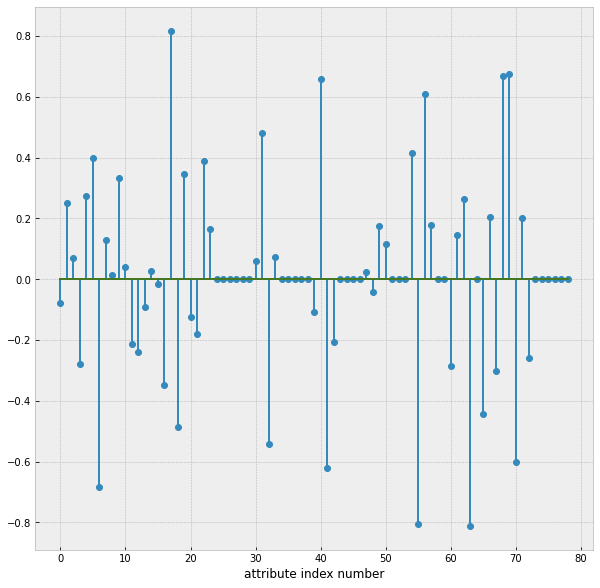

In [40]:
plt.rcParams["figure.figsize"] = (10,10)

plt.figure()
plt.stem(dataf2["Coefficients"])
plt.xlabel('attribute index number')

### Classifiers for Predicting the Day of Purchase

#### Decision Tree

In [41]:
print("Classification report on classifying day of purchase on training data(0-> Monday, 1-> Tuesday, 2-> Wednesday, 3-> Thursday, 4-> Friday, 5-> Saturday, 6-> Sunday)")
print(classification_report(day_train_target,predicted_train_dt_day))

Classification report on classifying day of purchase on training data(0-> Monday, 1-> Tuesday, 2-> Wednesday, 3-> Thursday, 4-> Friday, 5-> Saturday, 6-> Sunday)
              precision    recall  f1-score   support

           0       0.31      0.09      0.14       100
           1       0.24      0.53      0.33       126
           2       0.48      0.27      0.34       115
           3       0.34      0.31      0.32       110
           4       0.47      0.28      0.35       111
           5       0.27      0.47      0.34       131
           6       0.44      0.13      0.20       107

    accuracy                           0.31       800
   macro avg       0.36      0.30      0.29       800
weighted avg       0.36      0.31      0.29       800



In [42]:
scores = cross_val_score(final_dt_model_day, day_train_data, day_train_target,
                        cv=10,
                        scoring='accuracy')

print('95% CI for training data: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

95% CI for training data:  (0.12070371144521312, 0.19429628855478687)


In [43]:
print("Classification report on classifying day of purchase on testing data(0-> Monday, 1-> Tuesday, 2-> Wednesday, 3-> Thursday, 4-> Friday, 5-> Saturday, 6-> Sunday)")
print(classification_report(day_test_target,predicted_test_dt_day))

Classification report on classifying day of purchase on testing data(0-> Monday, 1-> Tuesday, 2-> Wednesday, 3-> Thursday, 4-> Friday, 5-> Saturday, 6-> Sunday)
              precision    recall  f1-score   support

           0       0.20      0.04      0.07        25
           1       0.19      0.41      0.26        32
           2       0.16      0.11      0.13        28
           3       0.08      0.07      0.08        28
           4       0.20      0.14      0.17        28
           5       0.16      0.27      0.20        33
           6       0.00      0.00      0.00        26

    accuracy                           0.16       200
   macro avg       0.14      0.15      0.13       200
weighted avg       0.14      0.16      0.13       200



In [44]:
scores = cross_val_score(final_dt_model_day, day_test_data, day_test_target,
                        cv=10,
                        scoring='accuracy')

print('95% CI for testing data: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

95% CI for testing data:  (0.1135718862799106, 0.22642811372008942)


#### Random Forest

In [45]:
print("Classification report on classifying day of purchase on training data(0-> Monday, 1-> Tuesday, 2-> Wednesday, 3-> Thursday, 4-> Friday, 5-> Saturday, 6-> Sunday)")
print(classification_report(day_train_target,predicted_train_rf_day))

Classification report on classifying day of purchase on training data(0-> Monday, 1-> Tuesday, 2-> Wednesday, 3-> Thursday, 4-> Friday, 5-> Saturday, 6-> Sunday)
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       100
           1       0.68      0.83      0.74       126
           2       0.80      0.78      0.79       115
           3       0.80      0.67      0.73       110
           4       0.74      0.70      0.72       111
           5       0.67      0.89      0.77       131
           6       0.85      0.72      0.78       107

    accuracy                           0.74       800
   macro avg       0.76      0.74      0.74       800
weighted avg       0.75      0.74      0.74       800



In [46]:
scores = cross_val_score(final_rf_model_day, day_train_data, day_train_target,
                        cv=10,
                        scoring='accuracy')

print('95% CI for training data: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

95% CI for training data:  (0.11729434616651219, 0.17270565383348774)


In [47]:
print("Classification report on classifying day of purchase on testing data(0-> Monday, 1-> Tuesday, 2-> Wednesday, 3-> Thursday, 4-> Friday, 5-> Saturday, 6-> Sunday)")
print(classification_report(day_test_target,predicted_test_rf_day))

Classification report on classifying day of purchase on testing data(0-> Monday, 1-> Tuesday, 2-> Wednesday, 3-> Thursday, 4-> Friday, 5-> Saturday, 6-> Sunday)
              precision    recall  f1-score   support

           0       0.17      0.04      0.06        25
           1       0.21      0.34      0.26        32
           2       0.20      0.29      0.23        28
           3       0.14      0.07      0.10        28
           4       0.16      0.14      0.15        28
           5       0.10      0.15      0.12        33
           6       0.08      0.04      0.05        26

    accuracy                           0.16       200
   macro avg       0.15      0.15      0.14       200
weighted avg       0.15      0.16      0.14       200



In [48]:
scores = cross_val_score(final_rf_model_day, day_test_data, day_test_target,
                        cv=10,
                        scoring='accuracy')

print('95% CI for testing data: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

95% CI for testing data:  (0.12305912822201628, 0.19694087177798367)
